In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
!git clone https://github.com/Compfest-AIdea/machine-learning.git

Cloning into 'machine-learning'...
remote: Enumerating objects: 384, done.
remote: Counting objects: 100% (384/384), done.
remote: Compressing objects: 100% (381/381), done.
remote: Total 384 (delta 19), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (384/384), 4.66 MiB | 25.50 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [3]:
df = pd.read_csv("/content/machine-learning/Dataset/Dataset-Tabular/hair_loss_selected.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   hair_loss               396 non-null    int64
 1   stay_up_late            396 non-null    int64
 2   coffee_consumed         396 non-null    int64
 3   brain_working_duration  396 non-null    int64
 4   pressure_level          396 non-null    int64
 5   stress_level            396 non-null    int64
 6   swimming                396 non-null    int64
 7   hair_washing            396 non-null    int64
 8   dandruff                396 non-null    int64
dtypes: int64(9)
memory usage: 28.0 KB


# Data Augmentation

In [5]:
df

,hair_loss,stay_up_late,coffee_consumed,brain_working_duration,pressure_level,stress_level,swimming,hair_washing,dandruff
0,0,2,0,1,0,0,0,1,0
1,0,0,0,3,0,0,0,0,0
2,1,3,1,0,0,0,1,1,0
3,0,2,0,1,0,0,0,0,0
4,0,2,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
391,1,1,1,2,0,0,0,0,0
392,0,1,0,3,0,0,1,1,0
393,1,1,1,1,0,0,0,0,0
394,1,0,1,1,0,0,0,0,0


In [6]:
df['hair_loss'].value_counts()

0    166
1    166
2     42
3     22
Name: hair_loss, dtype: int64

In [7]:
!pip install imbalanced-learn

In [8]:
X = df.drop('hair_loss', axis=1)
y = df['hair_loss']

In [9]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy={2: 50, 3:50})
X_resampled, y_resampled = smote.fit_resample(X, y)

In [10]:
df_aug = X_resampled.copy()
df_aug['hair_loss'] = y_resampled

In [11]:
df_aug

,stay_up_late,coffee_consumed,brain_working_duration,pressure_level,stress_level,swimming,hair_washing,dandruff,hair_loss
0,2,0,1,0,0,0,1,0,0
1,0,0,3,0,0,0,0,0,0
2,3,1,0,0,0,1,1,0,1
3,2,0,1,0,0,0,0,0,0
4,2,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
427,8,8,18,3,3,0,0,2,3
428,6,7,16,3,3,0,0,2,3
429,7,7,17,3,3,0,0,2,3
430,4,6,13,3,3,0,0,2,3


In [12]:
df_aug['hair_loss'].value_counts()

0    166
1    166
2     50
3     50
Name: hair_loss, dtype: int64

In [13]:
df_aug.to_csv("/content/machine-learning/Dataset/Dataset-Tabular/hair_loss_aug.csv", index = False)

In [14]:
Y = df_aug['hair_loss']

In [15]:
Y.unique()

array([0, 1, 2, 3])

In [16]:
#hair_grease, coffee_consumed, pressure_level, stress_level, swimming, hair_washing, dandruff
X = df_aug.loc[:, df_aug.columns != 'hair_loss']

In [17]:
X

,stay_up_late,coffee_consumed,brain_working_duration,pressure_level,stress_level,swimming,hair_washing,dandruff
0,2,0,1,0,0,0,1,0
1,0,0,3,0,0,0,0,0
2,3,1,0,0,0,1,1,0
3,2,0,1,0,0,0,0,0
4,2,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...
427,8,8,18,3,3,0,0,2
428,6,7,16,3,3,0,0,2
429,7,7,17,3,3,0,0,2
430,4,6,13,3,3,0,0,2


In [18]:
x_train, x_test, y_train, y_test= train_test_split(X, Y, random_state = 42, train_size=0.7)

In [19]:
print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (302, 8)
x_test:  (130, 8)
y_train:  (302,)
y_test:  (130,)


In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Custom Model Development

In [21]:
class StopperCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') >= 0.89 and logs.get('val_accuracy') >= 0.89:
            print("\nTraining is stopped because both training and validation accuracy reached 88%.")
            self.model.stop_training = True

In [22]:
def scheduler(epoch, lr):
  if epoch % 8 != 0:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

In [29]:
def create_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X.shape[1])),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(4, activation='softmax')
  ])

  model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=tf.keras.optimizers.Adam(learning_rate=0.002))
  model.summary()
  return model

In [30]:
model = create_model()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                576       
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 4)                 132       
                                                                 
Total params: 3,844
Trainable params: 3,844
Non-trainable params: 0
_________________________________________________________________


In [31]:
stopper_callback = StopperCallback()
scheduler_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

history = model.fit(x_train, y_train,epochs=300, batch_size=32, validation_data=(x_test, y_test),callbacks=[stopper_callback, scheduler_callback])

Epoch 1/300
10/10 [==============================] - 1s 24ms/step - loss: 1.3772 - accuracy: 0.3709 - val_loss: 1.2821 - val_accuracy: 0.5385 - lr: 0.0018
Epoch 2/300
10/10 [==============================] - 0s 5ms/step - loss: 1.2727 - accuracy: 0.5298 - val_loss: 1.1641 - val_accuracy: 0.6462 - lr: 0.0018
Epoch 3/300
10/10 [==============================] - 0s 5ms/step - loss: 1.1616 - accuracy: 0.5728 - val_loss: 1.0387 - val_accuracy: 0.7154 - lr: 0.0018
Epoch 4/300
10/10 [==============================] - 0s 7ms/step - loss: 1.0666 - accuracy: 0.6060 - val_loss: 0.9306 - val_accuracy: 0.7154 - lr: 0.0018
Epoch 5/300
10/10 [==============================] - 0s 7ms/step - loss: 0.9690 - accuracy: 0.6689 - val_loss: 0.8397 - val_accuracy: 0.6846 - lr: 0.0018
Epoch 6/300
10/10 [==============================] - 0s 6ms/step - loss: 0.8718 - accuracy: 0.6821 - val_loss: 0.7554 - val_accuracy: 0.7000 - lr: 0.0018
Epoch 7/300
10/10 [==============================] - 0s 7ms/step - loss: 0.

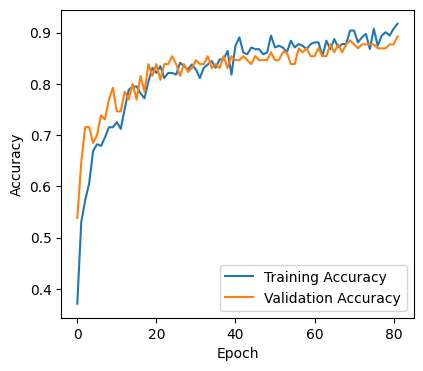

In [32]:
# Plot akurasi dan loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

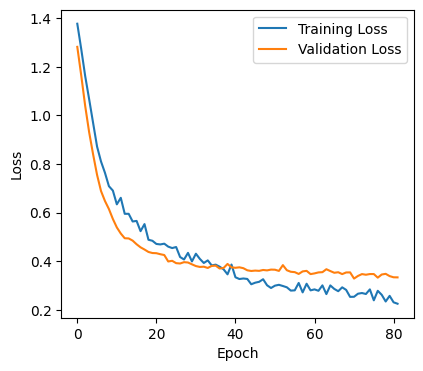

In [33]:
# Plot akurasi dan loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [34]:
saved_model_path = "/content/machine-learning/Models/hairloss_model.h5"
model.save(saved_model_path)